## CS634_Data Mining - Final_Project

## Using Random Forest, GRU & SVM to Predict Diabetes

### Improting the Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, brier_score_loss, precision_score, balanced_accuracy_score
from sklearn.metrics import classification_report, precision_recall_curve, accuracy_score, recall_score, f1_score

In [2]:
path = "/content/diabetes_dataset.csv"
df = pd.read_csv(path)

In [3]:
display(df)

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,55,Female,White,Graduate,Lower-Middle,Unemployed,Current,1,55,6.4,...,232,54,160,125,85,105,3.31,5.41,29.2,No Diabetes
1,82,Female,White,Graduate,Middle,Employed,Never,0,110,9.1,...,182,58,105,108,122,198,20.76,7.72,50.8,Type 2
2,70,Male,Black,Postgraduate,Low,Retired,Never,1,92,7.4,...,191,72,78,98,105,120,12.42,6.11,29.5,Pre-Diabetes
3,18,Male,White,Graduate,Upper-Middle,Student,Current,2,154,3.6,...,185,54,110,85,121,160,6.66,6.37,34.2,Pre-Diabetes
4,55,Male,White,Graduate,Low,Employed,Current,3,5,7.5,...,189,46,103,56,85,112,3.82,5.35,31.2,Type 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21,Male,Black,Postgraduate,Lower-Middle,Employed,Never,3,188,5.6,...,154,60,71,68,108,132,9.47,6.34,16.0,Pre-Diabetes
9996,55,Male,White,Graduate,Lower-Middle,Employed,Never,5,108,3.7,...,204,54,122,149,102,148,21.27,6.01,31.5,Pre-Diabetes
9997,26,Female,White,Graduate,Low,Student,Never,2,46,4.9,...,146,61,63,79,95,151,3.68,6.13,19.2,Pre-Diabetes
9998,57,Female,Asian,Postgraduate,Middle,Employed,Never,1,36,7.5,...,232,48,163,70,112,146,8.04,6.09,49.2,Pre-Diabetes


### Understanding the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 10000 non-null  int64  
 1   gender                              10000 non-null  object 
 2   ethnicity                           10000 non-null  object 
 3   education_level                     10000 non-null  object 
 4   income_level                        10000 non-null  object 
 5   employment_status                   10000 non-null  object 
 6   smoking_status                      10000 non-null  object 
 7   alcohol_consumption_per_week        10000 non-null  int64  
 8   physical_activity_minutes_per_week  10000 non-null  int64  
 9   diet_score                          10000 non-null  float64
 10  sleep_hours_per_day                 10000 non-null  float64
 11  screen_time_hours_per_day           10000 

### Data Cleaning

In [ ]:
df.isna().sum()

,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

### Histogram plot

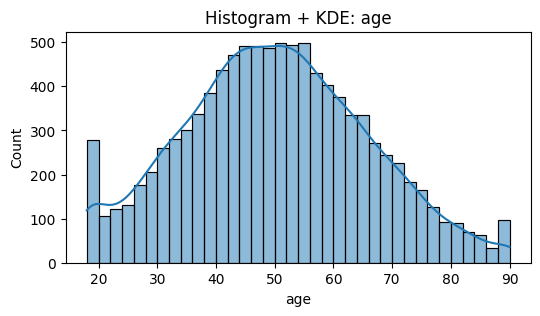

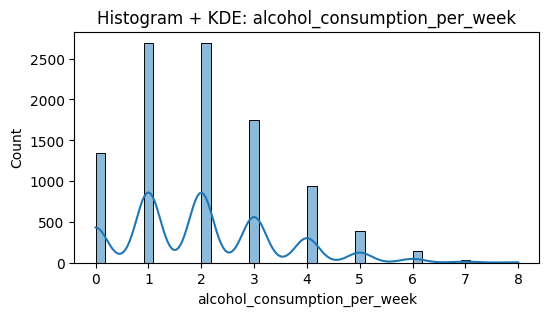

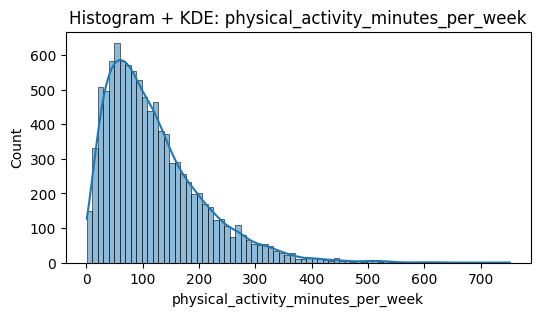

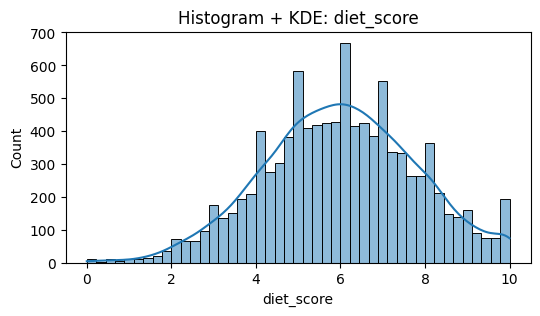

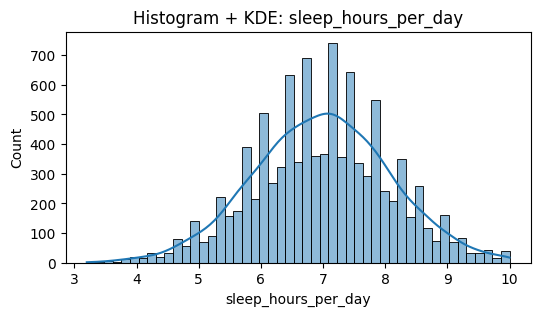

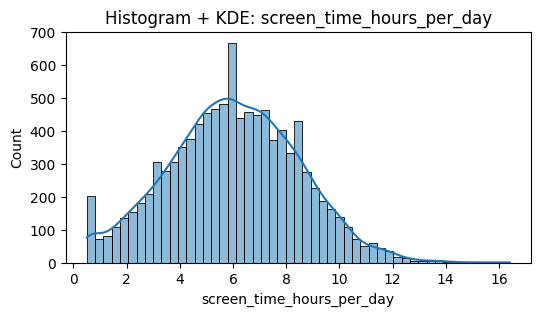

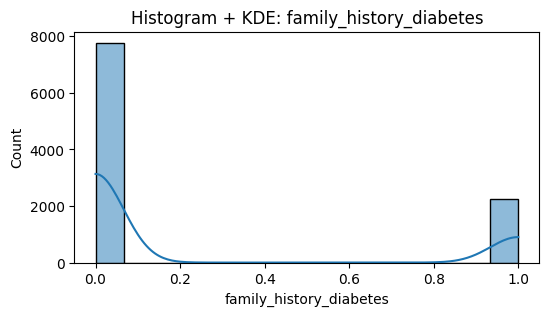

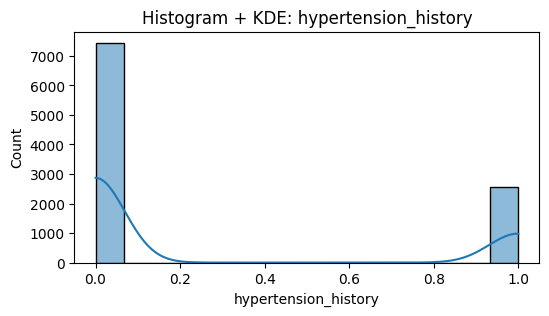

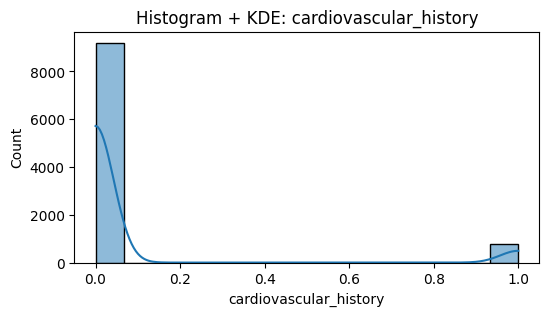

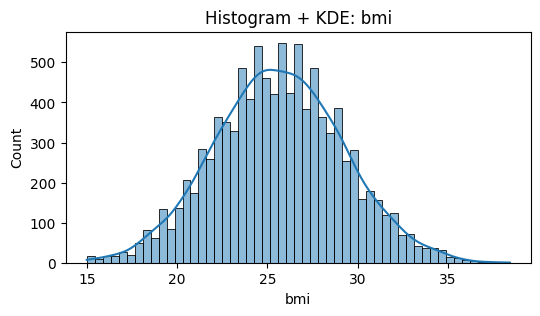

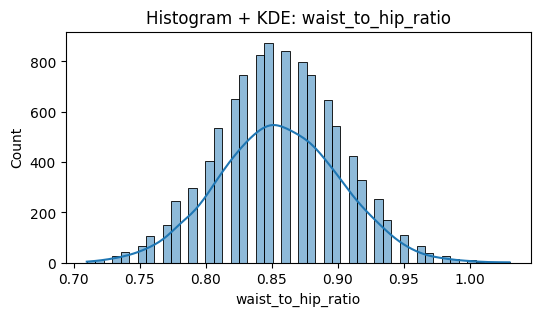

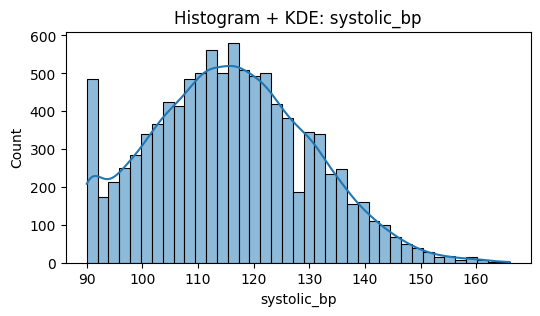

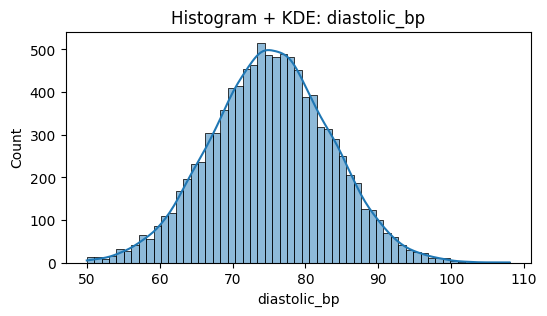

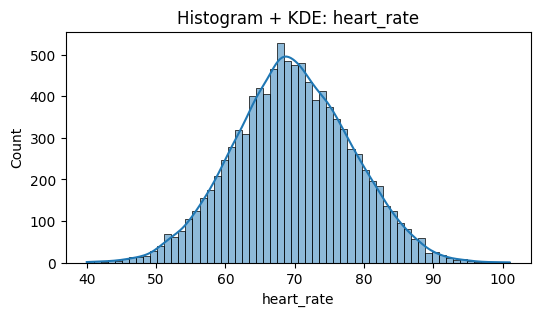

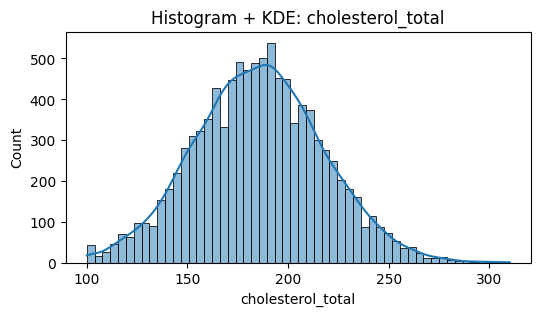

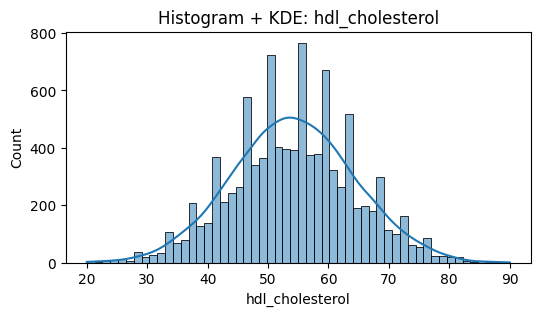

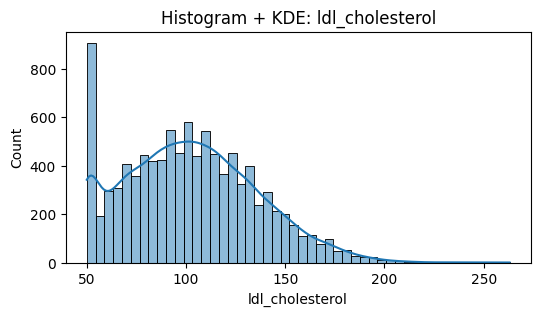

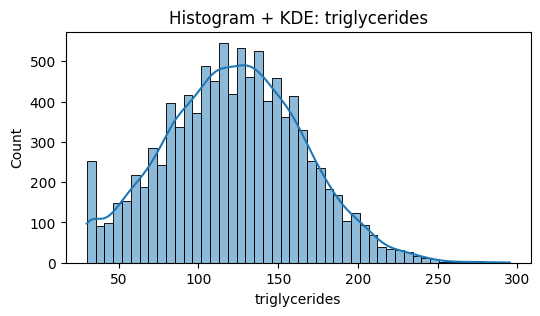

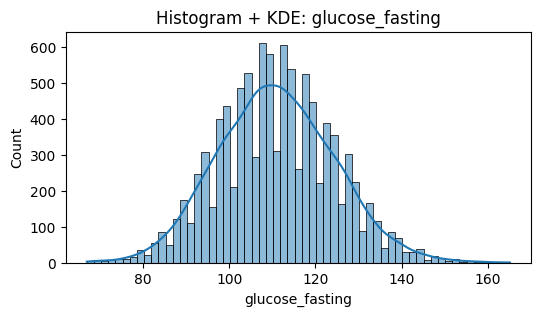

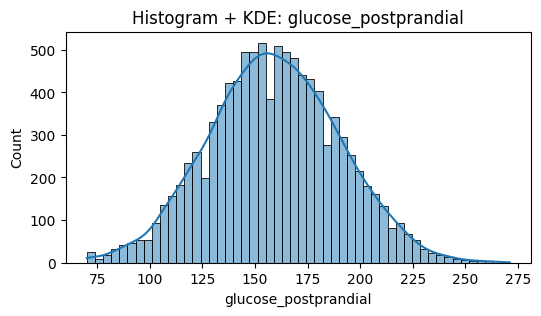

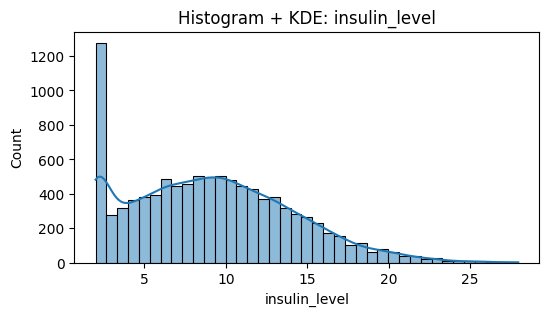

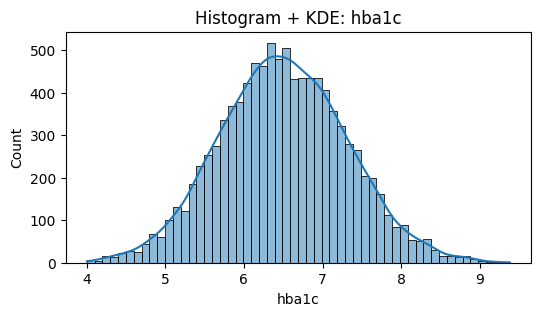

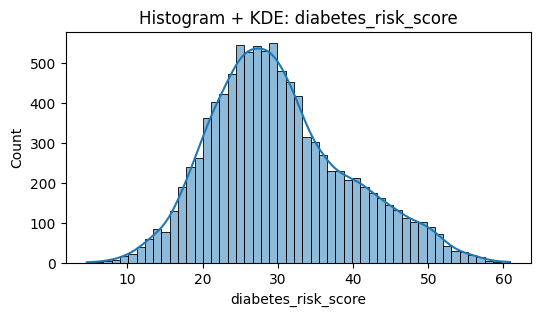

In [4]:
numeric = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric:
    fig, ax = plt.subplots(figsize=(6,3))
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Histogram + KDE: {col}")

### Histogram plot

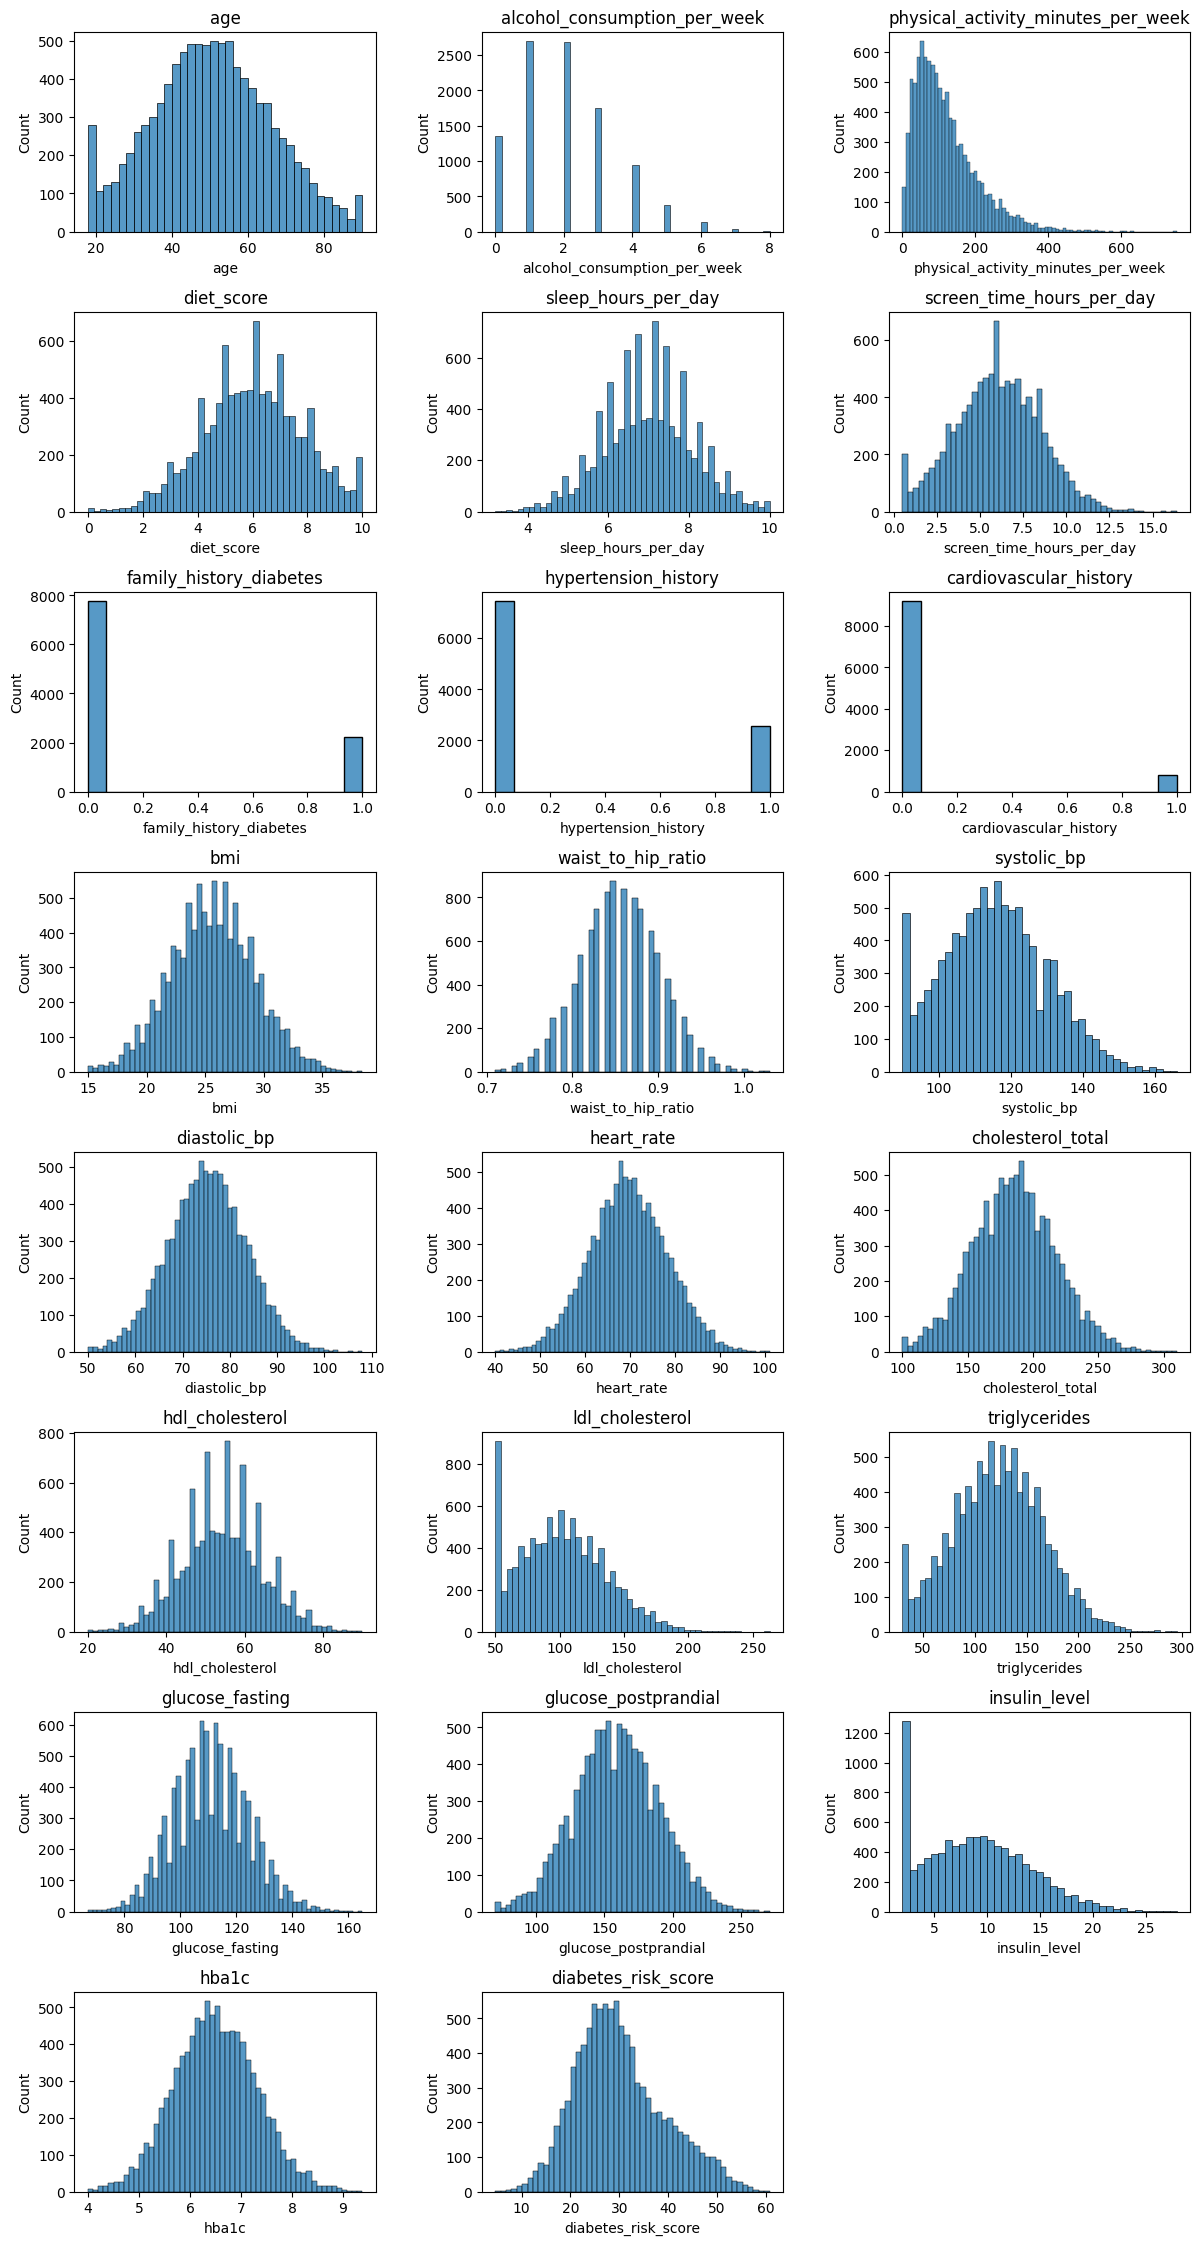

In [5]:
n = len(numeric)
cols = 3
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i, col in enumerate(numeric):
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.subplots_adjust(
    left=0.05,
    right=0.98,
    top=0.95,
    bottom=0.05,
    wspace=0.35,
    hspace=0.40
)

plt.show()

### Violin Plot

Text(0.5, 1.0, 'Violin Plot for All Numeric Features')

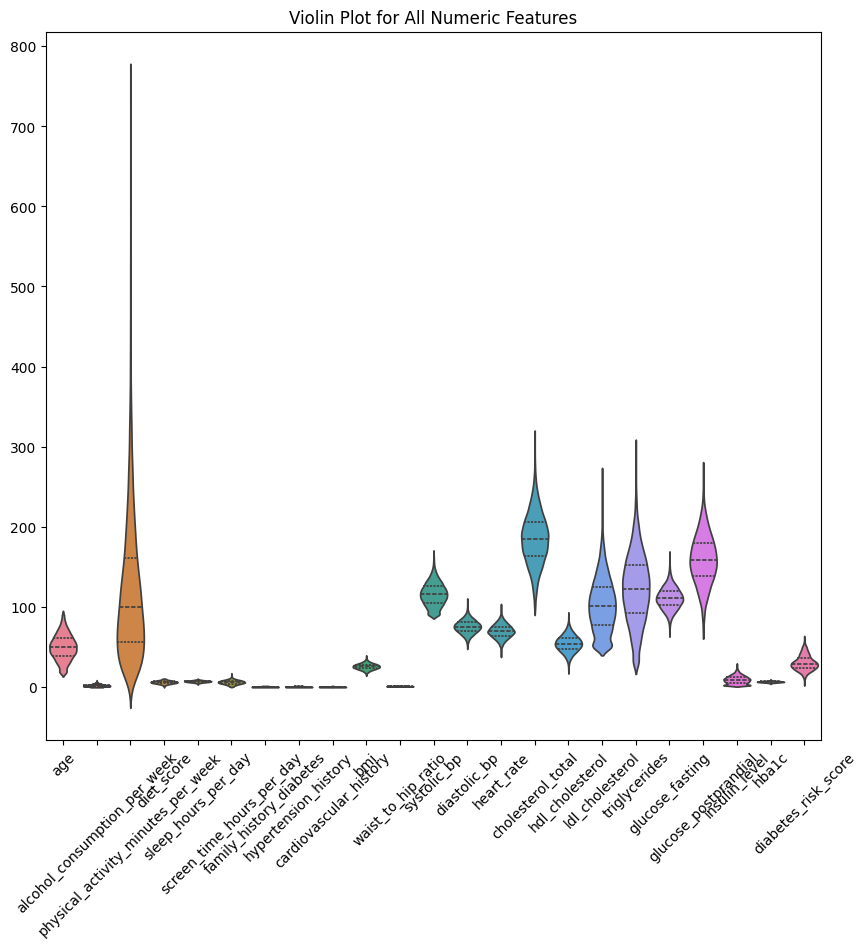

In [6]:
fig, ax = plt.subplots(figsize=(10, max(4, 0.4*len(numeric))))
sns.violinplot(data=df[numeric], inner="quartile", orient="v", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Violin Plot for All Numeric Features")

### Heat Map

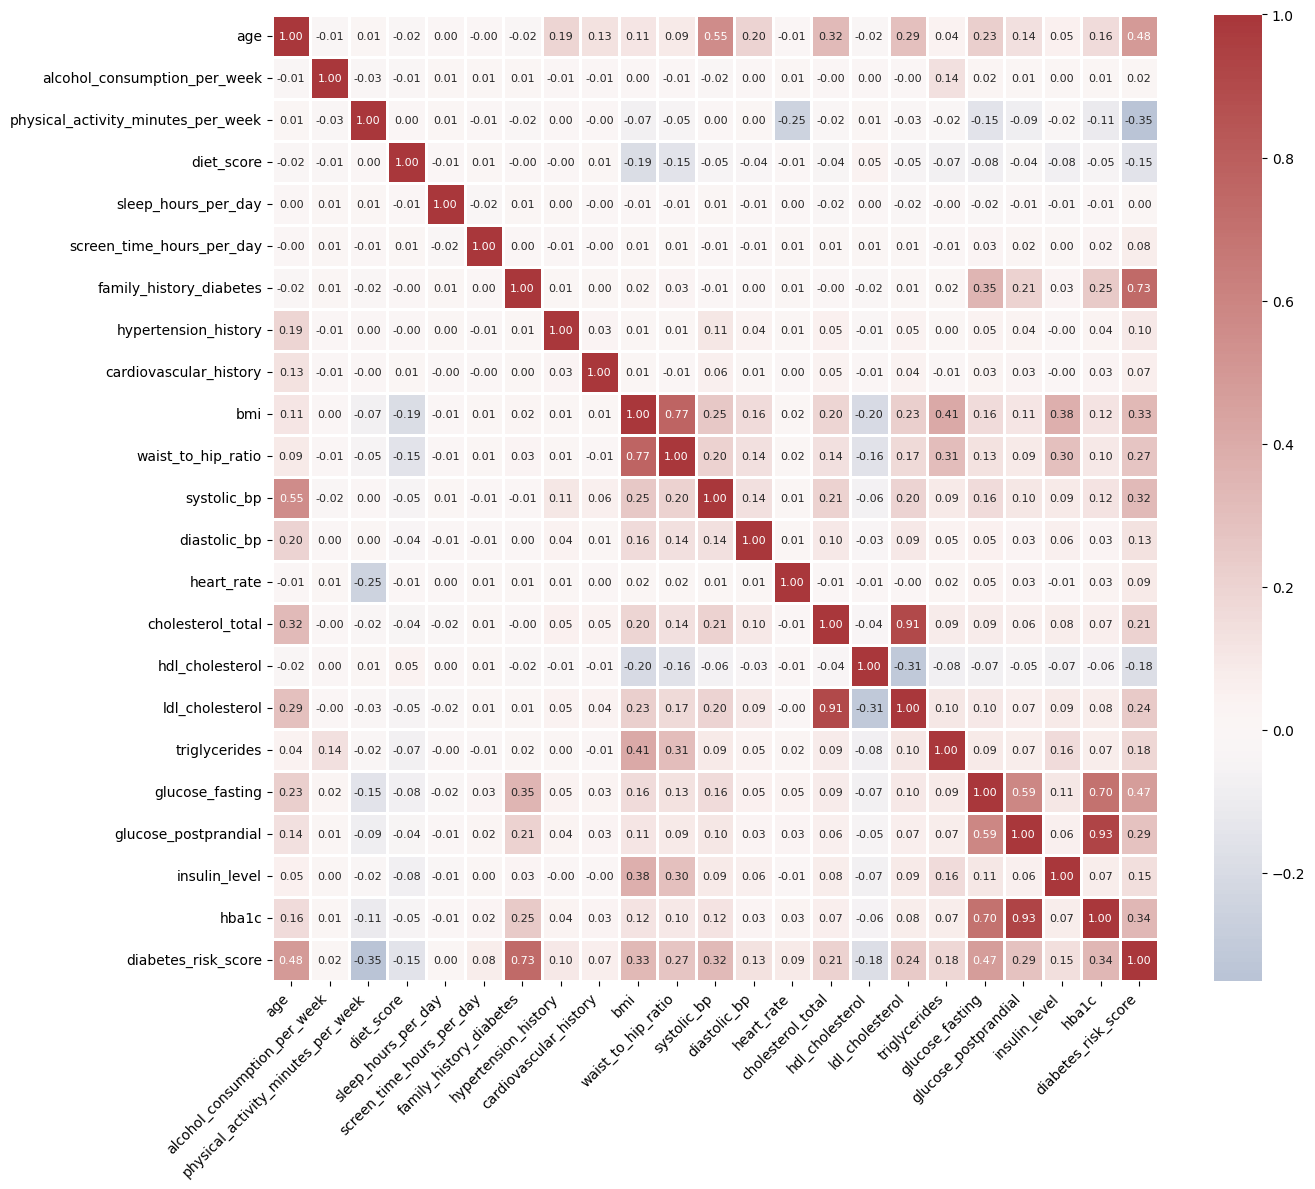

In [7]:
corr = df[numeric].corr()

fig, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=1,
    linecolor="white",
    annot_kws={"size": 8}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Scatterplot

Text(0.5, 1.0, 'alcohol_consumption_per_week vs age')

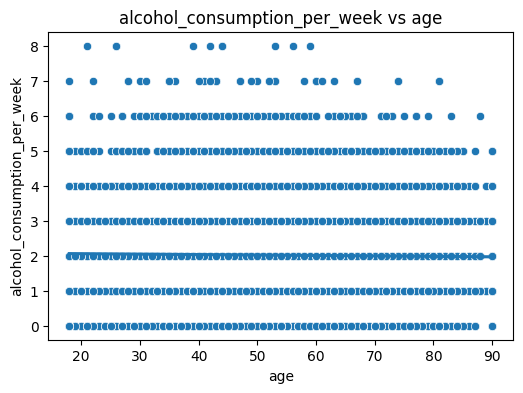

In [8]:
x = numeric[0]
y = numeric[1]

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df, x=x, y=y, hue="Outcome" if "Outcome" in df.columns else None, ax=ax)
sns.regplot(data=df, x=x, y=y, scatter=False, ax=ax, ci=None)
ax.set_title(f"{y} vs {x}")

### Join Plot

Text(0.5, 1.02, 'Jointplot Hex: age vs alcohol_consumption_per_week')

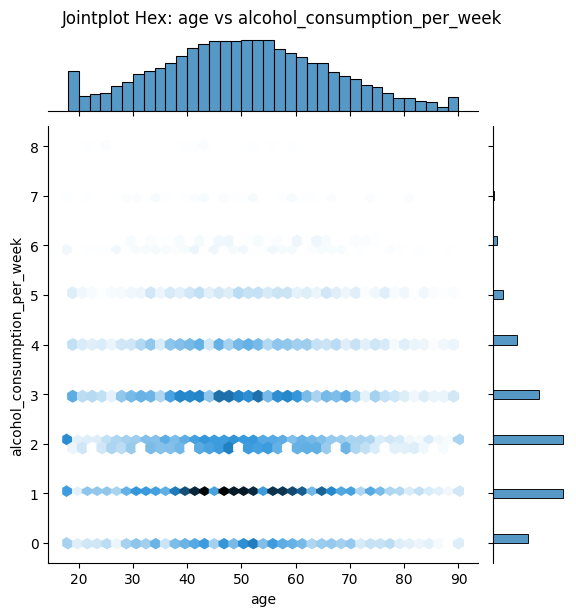

In [9]:
jp = sns.jointplot(data=df, x=x, y=y, kind="hex", height=6)
jp.fig.suptitle(f"Jointplot Hex: {x} vs {y}", y=1.02)

### Count Plot

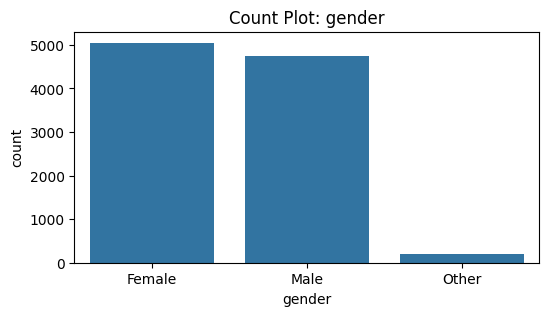

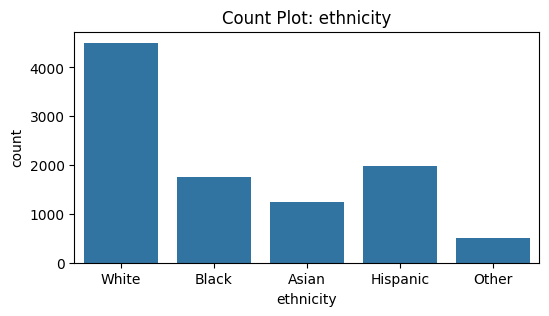

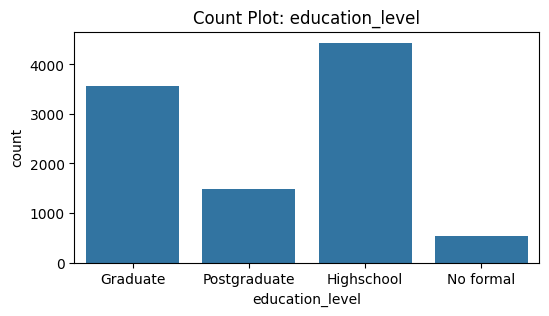

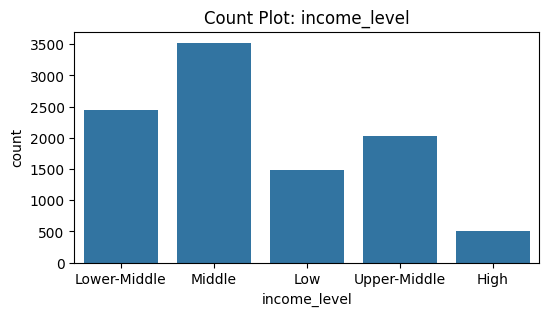

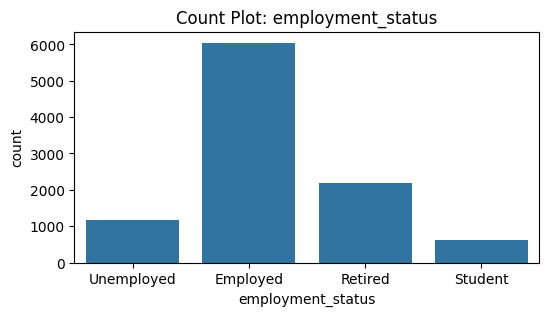

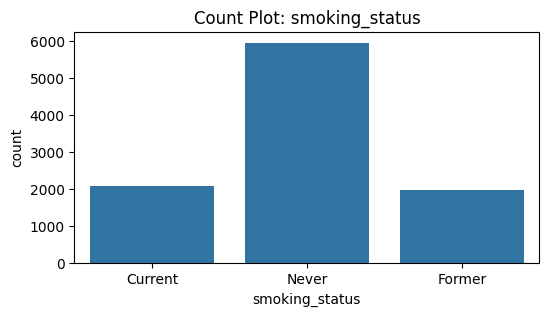

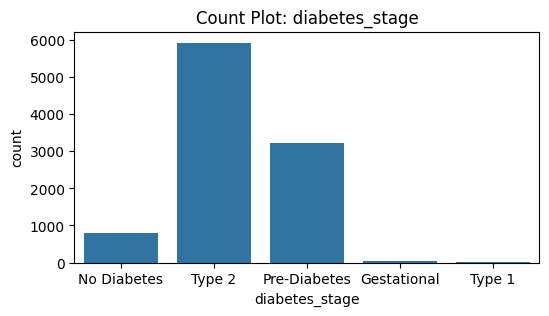

In [10]:
categorical = df.select_dtypes(exclude=np.number).columns.tolist()

for col in categorical:
    fig, ax = plt.subplots(figsize=(6,3))
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f"Count Plot: {col}")

### Density Plot

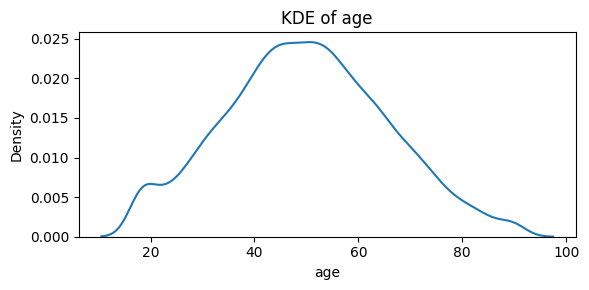

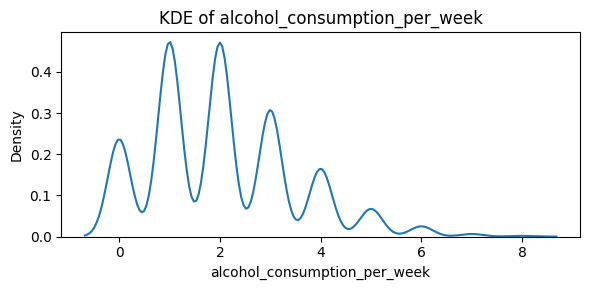

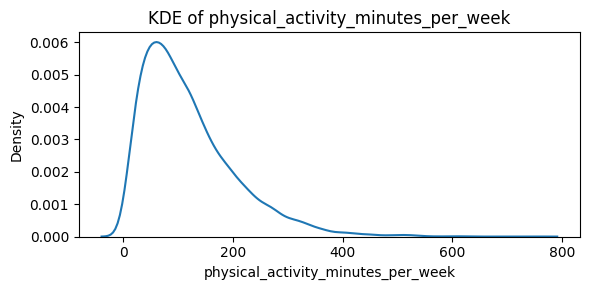

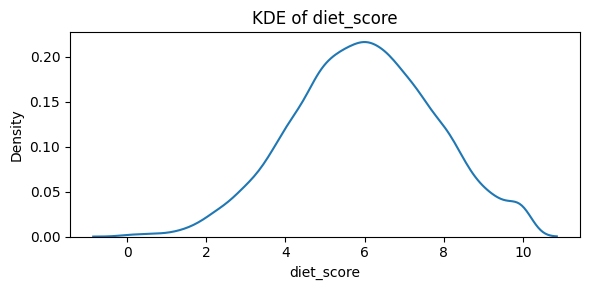

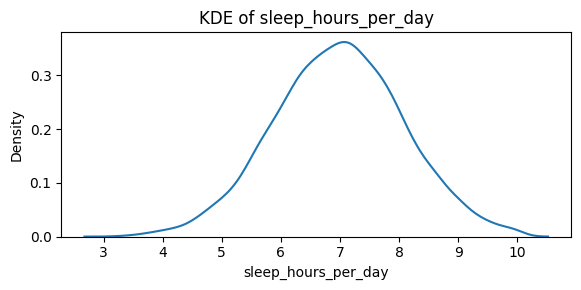

In [11]:
numeric = df.select_dtypes(include="number").columns.tolist()

for col in numeric[:5]:
    fig, ax = plt.subplots(figsize=(6,3))
    sns.kdeplot(df[col].dropna(), ax=ax)
    ax.set_title(f"KDE of {col}")
    plt.tight_layout()
    display(fig)
    plt.close(fig)

### Boxplot

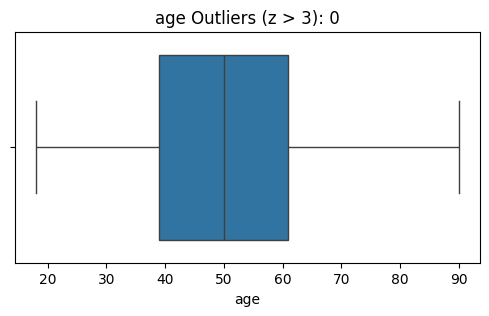

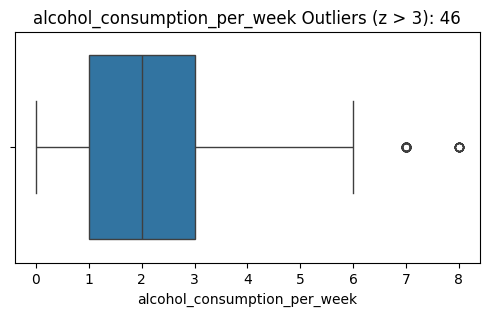

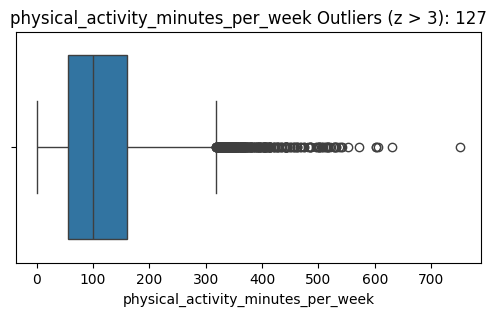

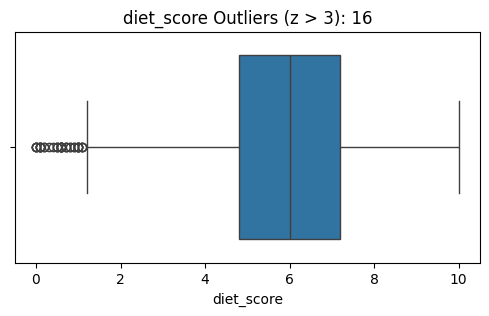

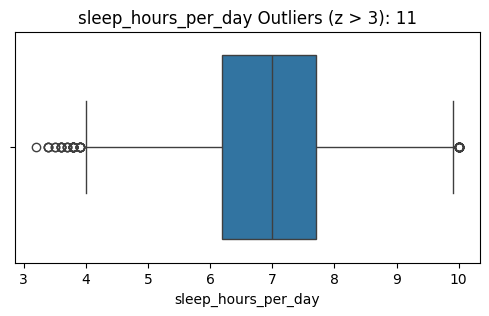

In [12]:
for col in numeric[:5]:
    s = df[col].dropna()
    z = (s - s.mean()) / s.std()
    outliers = s[abs(z) > 3]

    fig, ax = plt.subplots(figsize=(6,3))
    sns.boxplot(x=s, ax=ax)
    ax.set_title(f"{col} Outliers (z > 3): {len(outliers)}")

### Plotly Scatterplot

In [13]:
import plotly.express as px

num_cols = df.select_dtypes(include="number").columns.tolist()
dims = num_cols[:8]

sample = df.sample(n=min(len(df), 1000), random_state=0)
color = "Outcome" if "Outcome" in df.columns else None

fig = px.scatter_matrix(
    sample,
    dimensions=dims,
    color=color,
    title="Plotly Scatter Matrix",
)

fig.update_traces(diagonal_visible=True, marker=dict(size=3, opacity=0.6))

fig.update_layout(
    width=1400,
    height=1400,
    margin=dict(l=80, r=80, t=120, b=80),
    dragmode=False,
)

fig.show()

### Plotly Box Plot

In [14]:
import plotly.express as px

num_cols = df.select_dtypes(include="number").columns.tolist()

for col in num_cols[:3]:
    fig = px.box(
        df,
        y=col,
        points="outliers",
        title=f"Box Plot — {col}"
    )
    fig.update_layout(
        width=600,
        height=450,
        margin=dict(l=60, r=60, t=80, b=60)
    )
    fig.show()

### Labelling Target Column & Preprocessing the Data

In [ ]:
# Manual mapping with safe fallback for unmapped values
df['diabetes_result'] = (
    df['diabetes_stage']
    .map({
        'No Diabetes': 0,
        'Pre-Diabetes': 0,
        'Type 1': 1,
        'Type 2': 1,
        'Gestational': 1
    })
    .fillna(1)  # any unknown or blank stage → diabetic (1)
    .astype(int)
)

print(df[['diabetes_stage', 'diabetes_result']].head(10))

print("\nValue counts:")
print(df['diabetes_result'].value_counts())

  diabetes_stage  diabetes_result
0    No Diabetes                0
1         Type 2                1
2   Pre-Diabetes                0
3   Pre-Diabetes                0
4         Type 2                1
5   Pre-Diabetes                0
6         Type 2                1
7         Type 2                1
8         Type 2                1
9         Type 2                1

Value counts:
diabetes_result
1    5971
0    4029
Name: count, dtype: int64


In [ ]:
print(df[['diabetes_stage', 'diabetes_result']].head(10))

  diabetes_stage  diabetes_result
0    No Diabetes                0
1         Type 2                1
2   Pre-Diabetes                0
3   Pre-Diabetes                0
4         Type 2                1
5   Pre-Diabetes                0
6         Type 2                1
7         Type 2                1
8         Type 2                1
9         Type 2                1


In [ ]:
df[['diabetes_stage', 'diabetes_result']].value_counts()

,,count
diabetes_stage,diabetes_result,
Type 2,1,5927
Pre-Diabetes,0,3228
No Diabetes,0,801
Gestational,1,30
Type 1,1,14


In [ ]:
df[['diabetes_stage','diabetes_result']].nunique()

,0
diabetes_stage,5
diabetes_result,2


In [ ]:
TARGET_COL = 'diabetes_result'
assert TARGET_COL in df.columns, f"{TARGET_COL} not found in dataset columns."

In [ ]:
# Imputing missing/zero values for medical columns
cols_zero_impute = ['glucose_fasting','glucose_postprandial','insulin_level','bmi']
present_cols = [c for c in cols_zero_impute if c in df.columns]
for col in present_cols:
    df.loc[df[col] == 0, col] = np.nan
    df[col].fillna(df[col].median(), inplace=True)

# Encoding categorical columns
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    df[c] = df[c].astype('category').cat.codes

# Separate features and target
X = df.drop(columns=[TARGET_COL]).reset_index(drop=True)
y = df[TARGET_COL].reset_index(drop=True).astype(int)

# numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Shape of X:", X.shape)
print("Class balance:", y.value_counts(normalize=True))

Shape of X: (10000, 30)
Class balance: diabetes_result
1    0.5971
0    0.4029
Name: proportion, dtype: float64


### Splitting Input and Output

In [ ]:
corrs = df.corr()['diabetes_result'].sort_values(ascending=False)
print("Top correlated features with diabetes_result:\n")
print(corrs.head(15))

Top correlated features with diabetes_result:

diabetes_result            1.000000
diabetes_stage             0.953719
hba1c                      0.668218
glucose_postprandial       0.621231
glucose_fasting            0.496448
diabetes_risk_score        0.272255
family_history_diabetes    0.211332
age                        0.121056
bmi                        0.091999
systolic_bp                0.084909
waist_to_hip_ratio         0.078930
ldl_cholesterol            0.064345
triglycerides              0.056644
cholesterol_total          0.053717
insulin_level              0.052880
Name: diabetes_result, dtype: float64


### Removing diabetes stage from training cause diabetes stage and diabetes result are highly correlated. which will cause the models to suffer from data leakage.

In [ ]:
X = df.drop(columns=['diabetes_result', 'diabetes_stage'], errors='ignore')
y = df['diabetes_result']

In [ ]:
X,y

(      age  gender  ethnicity  education_level  income_level  \
 0      55       0          4                0             2   
 1      82       0          4                0             3   
 2      70       1          1                3             1   
 3      18       1          4                0             4   
 4      55       1          4                0             1   
 ...   ...     ...        ...              ...           ...   
 9995   21       1          1                3             2   
 9996   55       1          4                0             2   
 9997   26       0          4                0             1   
 9998   57       0          0                3             3   
 9999   40       0          4                1             4   
 
       employment_status  smoking_status  alcohol_consumption_per_week  \
 0                     3               0                             1   
 1                     0               2                             0   
 2      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)

In [ ]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
X_train.shape

(8000, 29)

In [ ]:
X_test.shape

(2000, 29)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

### Manual Metric Calculation

In [ ]:
# Step: Manual Confusion Matrix Calculation (No libraries)

def manual_confusion_matrix(y_true, y_pred):
    """
    Manually calculate TP, TN, FP, FN without using sklearn.
    Assumes binary classification with labels 0 and 1.
    """
    # Initialize counters
    TP = TN = FP = FN = 0

    # Loop through actual and predicted values
    for actual, predicted in zip(y_true, y_pred):
        if actual == 1 and predicted == 1:
            TP += 1
        elif actual == 0 and predicted == 0:
            TN += 1
        elif actual == 0 and predicted == 1:
            FP += 1
        elif actual == 1 and predicted == 0:
            FN += 1

    print("Manual Confusion Matrix:")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")

    return TP, TN, FP, FN

## Model Training

### Random Forest

Confusion Matrix:
 [[ 799    7]
 [ 177 1017]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       806
           1       0.99      0.85      0.92      1194

    accuracy                           0.91      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.91      0.91      2000

ROC AUC: 0.930089
Brier Score (BS): 0.077336
Brier Skill Score (BSS): 0.678560


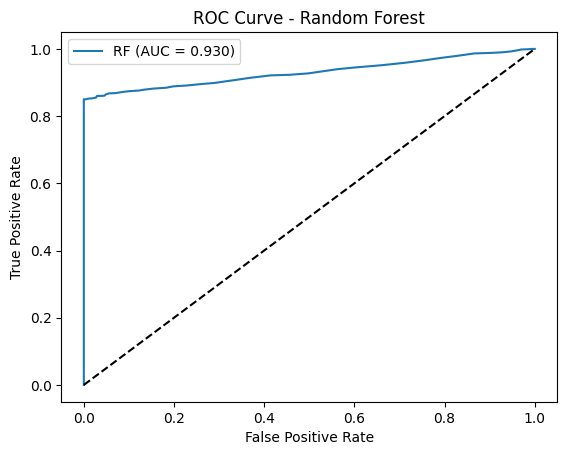

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=23)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Predicted probabilities for positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC AUC
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {auc:.6f}")

# Brier Score (BS) and Brier Skill Score (BSS)
bs = brier_score_loss(y_test, y_prob)
p_ref = float(np.mean(y_test))
bs_ref = float(np.mean((y_test - p_ref) ** 2))
bss = 1.0 - (bs / bs_ref) if bs_ref != 0 else 0.0
print(f"Brier Score (BS): {bs:.6f}")
print(f"Brier Skill Score (BSS): {bss:.6f}")

# ROC Curve plot
fpr_vals, tpr_vals, _ = roc_curve(y_test, y_prob)
plt.plot(fpr_vals, tpr_vals, label=f'RF (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Get TP, TN, FP, FN manually
TP, TN, FP, FN = manual_confusion_matrix(y_test.tolist(), y_pred_rf.tolist())

Manual Confusion Matrix:
True Positives (TP): 1017
True Negatives (TN): 799
False Positives (FP): 7
False Negatives (FN): 177


In [ ]:
# Scale numeric columns before cross-validation
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# Define model and 10-fold CV
model = RandomForestClassifier(n_estimators=100, random_state=23)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

# Display per-fold and average accuracy
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")
print(f"\nAverage Accuracy across 10 folds: {np.mean(cv_scores):.4f}")

Fold 1: Accuracy = 0.8990
Fold 2: Accuracy = 0.9250
Fold 3: Accuracy = 0.9050
Fold 4: Accuracy = 0.9140
Fold 5: Accuracy = 0.8840
Fold 6: Accuracy = 0.9150
Fold 7: Accuracy = 0.9100
Fold 8: Accuracy = 0.9210
Fold 9: Accuracy = 0.9220
Fold 10: Accuracy = 0.9220

Average Accuracy across 10 folds: 0.9117


In [ ]:
# 10-Fold Cross-Validation (per-fold + average metrics)

# Scale numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# Define model and 10-fold CV
model = RandomForestClassifier(n_estimators=100, random_state=23)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold_results = []

for i, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), start=1):
    X_tr, X_te = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_te, y_pred)
    TN, FP, FN, TP = cm.ravel()

    # Derived counts
    P = TP + FN
    N = TN + FP

    # Metrics
    TPR = TP / P if P > 0 else 0
    TNR = TN / N if N > 0 else 0
    FPR = FP / N if N > 0 else 0
    FNR = FN / P if P > 0 else 0
    accuracy = (TP + TN) / (P + N)
    precision = precision_score(y_te, y_pred)
    recall = recall_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred)
    bal_acc = balanced_accuracy_score(y_te, y_pred)
    error_rate = (FP + FN) / (P + N)
    TSS = TPR - FPR
    HSS_num = 2 * (TP * TN - FP * FN)
    HSS_den = ((TP + FN) * (FN + TN)) + ((TP + FP) * (FP + TN))
    HSS = HSS_num / HSS_den if HSS_den != 0 else 0

    # Brier Score (BS) and Brier Skill Score (BSS)
    BS = brier_score_loss(y_te, y_prob)
    p_ref = np.mean(y_te)
    BS_ref = np.mean((y_te - p_ref) ** 2)
    BSS = 1 - (BS / BS_ref) if BS_ref != 0 else 0

    # AUC
    AUC = roc_auc_score(y_te, y_prob)

    fold_results.append({
        'Fold': i, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'P': P, 'N': N,
        'TPR': TPR, 'TNR': TNR, 'FPR': FPR, 'FNR': FNR,
        'Accuracy': accuracy, 'Balanced Accuracy': bal_acc,
        'Precision': precision, 'Recall': recall, 'F1': f1,
        'Error Rate': error_rate, 'TSS': TSS, 'HSS': HSS,
        'Brier Score': BS, 'Brier Skill Score': BSS, 'AUC': AUC
    })

# Create per-fold results DataFrame
results_df = pd.DataFrame(fold_results)
display(results_df)

# Compute and display average metrics
avg_row = results_df.mean(numeric_only=True).to_frame().T
avg_row.index = ["Average"]
display(avg_row)

,Fold,TP,TN,FP,FN,P,N,TPR,TNR,FPR,...,Balanced Accuracy,Precision,Recall,F1,Error Rate,TSS,HSS,Brier Score,Brier Skill Score,AUC
0,1,496,403,0,101,597,403,0.830821,1.000000,0.000000,...,0.915410,1.000000,0.830821,0.907594,0.101,0.830821,0.798313,0.082824,0.655748,0.926448
1,2,522,403,0,75,597,403,0.874372,1.000000,0.000000,...,0.937186,1.000000,0.874372,0.932976,0.075,0.874372,0.848709,0.067358,0.720031,0.946033
2,3,504,401,2,93,597,403,0.844221,0.995037,0.004963,...,0.919629,0.996047,0.844221,0.913871,0.095,0.839258,0.809557,0.079272,0.670510,0.930764
3,4,511,403,0,86,597,403,0.855946,1.000000,0.000000,...,0.927973,1.000000,0.855946,0.922383,0.086,0.855946,0.827263,0.072420,0.698991,0.942992
4,5,485,399,4,112,597,403,0.812395,0.990074,0.009926,...,0.901235,0.991820,0.812395,0.893186,0.116,0.802470,0.768986,0.090231,0.624961,0.916591
5,6,514,401,2,83,597,403,0.860972,0.995037,0.004963,...,0.928004,0.996124,0.860972,0.923630,0.085,0.856009,0.828938,0.072388,0.699123,0.940314
6,7,509,401,2,88,597,403,0.852596,0.995037,0.004963,...,0.923817,0.996086,0.852596,0.918773,0.090,0.847634,0.819228,0.077598,0.677469,0.929376
7,8,519,402,1,78,597,403,0.869347,0.997519,0.002481,...,0.933433,0.998077,0.869347,0.929275,0.079,0.866865,0.840764,0.071222,0.703969,0.937211
8,9,520,402,1,77,597,403,0.871022,0.997519,0.002481,...,0.934270,0.998081,0.871022,0.930233,0.078,0.868540,0.842718,0.068473,0.715397,0.946133
9,10,521,401,1,77,598,402,0.871237,0.997512,0.002488,...,0.934375,0.998084,0.871237,0.930357,0.078,0.868750,0.842643,0.068767,0.713942,0.941632


,Fold,TP,TN,FP,FN,P,N,TPR,TNR,FPR,...,Balanced Accuracy,Precision,Recall,F1,Error Rate,TSS,HSS,Brier Score,Brier Skill Score,AUC
Average,5.5,510.1,401.6,1.3,87.0,597.1,402.9,0.854293,0.996774,0.003226,...,0.925533,0.997432,0.854293,0.920228,0.0883,0.851067,0.822712,0.075055,0.688014,0.935749


### LSTM

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6740 - loss: 1.4883 - val_accuracy: 0.7700 - val_loss: 0.4952
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7601 - loss: 0.5116 - val_accuracy: 0.7740 - val_loss: 0.4586
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.4446 - val_accuracy: 0.7945 - val_loss: 0.4404
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7854 - loss: 0.4498 - val_accuracy: 0.7980 - val_loss: 0.4503
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7835 - loss: 0.4473 - val_accuracy: 0.7575 - val_loss: 0.4649
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7817 - loss: 0.4603 - val_accuracy: 0.7540 - val_loss: 0.4668
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7869 - loss: 0.4481 - val_accuracy: 0.7990 - val_loss: 0.4297
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7863 - loss: 0.4490 - val_accuracy: 0.

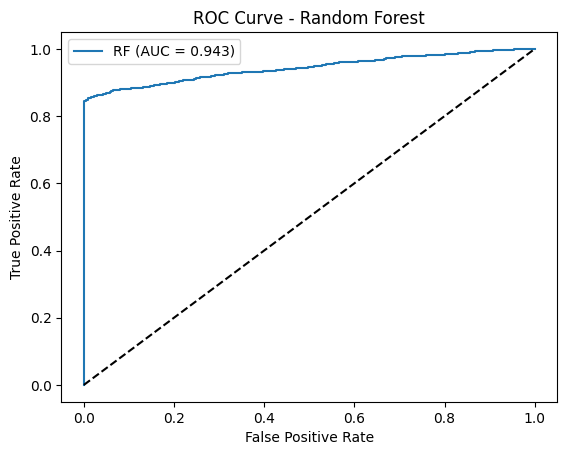

In [ ]:
# Reshape data for LSTM [samples, timesteps, features]
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Evaluate
loss, accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Accuracy: {accuracy:.4f}")

# Predictions & Metrics
y_prob_lstm = lstm_model.predict(X_test_lstm)          # probabilities for ROC
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)          # thresholded predictions

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Predicted probabilities for positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC AUC
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {auc:.6f}")

# Brier Score (BS) and Brier Skill Score (BSS)
bs = brier_score_loss(y_test, y_prob)
p_ref = float(np.mean(y_test))
bs_ref = float(np.mean((y_test - p_ref) ** 2))
bss = 1.0 - (bs / bs_ref) if bs_ref != 0 else 0.0
print(f"Brier Score (BS): {bs:.6f}")
print(f"Brier Skill Score (BSS): {bss:.6f}")

# ROC Curve plot
fpr_vals, tpr_vals, _ = roc_curve(y_test, y_prob)
plt.plot(fpr_vals, tpr_vals, label=f'RF (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Get TP, TN, FP, FN manually
TP, TN, FP, FN = manual_confusion_matrix(y_test.tolist(), y_pred_rf.tolist())

Manual Confusion Matrix:
True Positives (TP): 1020
True Negatives (TN): 795
False Positives (FP): 11
False Negatives (FN): 174


In [ ]:
# Scale numeric columns before cross-validation
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# model and 10-fold CV
model = RandomForestClassifier(n_estimators=100, random_state=23)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

# per-fold and average accuracy
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")
print(f"\nAverage Accuracy across 10 folds: {np.mean(cv_scores):.4f}")

Fold 1: Accuracy = 0.8990
Fold 2: Accuracy = 0.9250
Fold 3: Accuracy = 0.9050
Fold 4: Accuracy = 0.9140
Fold 5: Accuracy = 0.8840
Fold 6: Accuracy = 0.9150
Fold 7: Accuracy = 0.9100
Fold 8: Accuracy = 0.9210
Fold 9: Accuracy = 0.9220
Fold 10: Accuracy = 0.9220

Average Accuracy across 10 folds: 0.9117


In [ ]:
# 10-Fold Cross-Validation with LSTM (per-fold metrics + average)

np.random.seed(42)
tf.random.set_seed(42)
n_splits = 10
epochs = 8
batch_size = 32
lstm_units = 32
l2_reg = 1e-4
dropout_rate = 0.2

# Scale numeric columns globally then split
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X_scaled = X.copy()
scaler_global = StandardScaler()
if len(numeric_cols) > 0:
    X_scaled[numeric_cols] = scaler_global.fit_transform(X_scaled[numeric_cols])

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_results = []
fold_idx = 0

for train_idx, test_idx in skf.split(X_scaled, y):
    fold_idx += 1
    # Split
    X_tr_df = X_scaled.iloc[train_idx].reset_index(drop=True)
    X_te_df = X_scaled.iloc[test_idx].reset_index(drop=True)
    y_tr = y.iloc[train_idx].values
    y_te = y.iloc[test_idx].values

    # Convert to numpy and reshape for LSTM
    X_tr = X_tr_df.values.astype(np.float32)
    X_te = X_te_df.values.astype(np.float32)
    X_tr_lstm = np.expand_dims(X_tr, axis=1)
    X_te_lstm = np.expand_dims(X_te, axis=1)

    # Build a fresh LSTM model for each fold
    model = Sequential([
        LSTM(lstm_units, activation='tanh', kernel_regularizer=l2(l2_reg), input_shape=(1, X_tr.shape[1])),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_reg))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    # Training
    model.fit(X_tr_lstm, y_tr, epochs=epochs, batch_size=batch_size, validation_data=(X_te_lstm, y_te), verbose=0)

    # Predict
    y_prob = model.predict(X_te_lstm, batch_size=batch_size, verbose=0).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_te, y_pred)
    TN, FP, FN, TP = cm.ravel()

    P = TP + FN
    N = TN + FP
    total = P + N

    # Rates and basic metrics
    def sdiv(a, b): return float(a) / float(b) if float(b) != 0 else 0.0

    TPR = sdiv(TP, P)
    TNR = sdiv(TN, N)
    FPR = sdiv(FP, N)
    FNR = sdiv(FN, P)
    Accuracy = sdiv(TP + TN, total)
    Precision = sdiv(TP, TP + FP)
    Recall = TPR
    F1 = sdiv(2 * Precision * Recall, (Precision + Recall)) if (Precision + Recall) != 0 else 0.0
    Balanced_Accuracy = 0.5 * (TPR + TNR)
    Error_rate = sdiv(FP + FN, total)
    TSS = TPR - FPR
    numerator_hss = 2.0 * (TP * TN - FP * FN)
    denom_hss = ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    HSS = sdiv(numerator_hss, denom_hss)

    # Probabilistic metrics
    BS = float(brier_score_loss(y_te, y_prob))
    p_ref = float(np.mean(y_te))
    BS_ref = float(np.mean((y_te - p_ref) ** 2))
    BSS = 1.0 - (BS / BS_ref) if BS_ref != 0 else 0.0

    # AUC (per-fold)
    try:
        AUC = float(roc_auc_score(y_te, y_prob)) if len(np.unique(y_te)) > 1 else None
    except Exception:
        AUC = None

    fold_results.append({
        'Fold': fold_idx,
        'TP': int(TP), 'TN': int(TN), 'FP': int(FP), 'FN': int(FN),
        'P': int(P), 'N': int(N),
        'TPR': round(TPR, 4), 'TNR': round(TNR, 4), 'FPR': round(FPR, 4), 'FNR': round(FNR, 4),
        'Accuracy': round(Accuracy, 4), 'Balanced Accuracy': round(Balanced_Accuracy, 4),
        'Precision': round(Precision, 4), 'Recall': round(Recall, 4), 'F1': round(F1, 4),
        'Error Rate': round(Error_rate, 4), 'TSS': round(TSS, 4), 'HSS': round(HSS, 4),
        'Brier Score': round(BS, 6), 'BSS': round(BSS, 6), 'AUC': round(AUC, 6) if AUC is not None else None
    })

# results DataFrame
results_df = pd.DataFrame(fold_results).set_index('Fold')
pd.set_option('display.precision', 4)
display(results_df)

# Average row
avg_row = results_df.mean(numeric_only=True).to_frame().T
avg_row.index = ['Average']
display(avg_row)

,TP,TN,FP,FN,P,N,TPR,TNR,FPR,FNR,...,Balanced Accuracy,Precision,Recall,F1,Error Rate,TSS,HSS,Brier Score,BSS,AUC
Fold,,,,,,,,,,,,,,,,,,,,,
1,500,371,32,97,597,403,0.8375,0.9206,0.0794,0.1625,...,0.8791,0.9398,0.8375,0.8857,0.129,0.7581,0.7388,0.0991,0.5879,0.9145
2,522,370,33,75,597,403,0.8744,0.9181,0.0819,0.1256,...,0.8962,0.9405,0.8744,0.9062,0.108,0.7925,0.7793,0.0821,0.6588,0.9406
3,508,374,29,89,597,403,0.8509,0.9280,0.0720,0.1491,...,0.8895,0.9460,0.8509,0.8959,0.118,0.7790,0.7606,0.0916,0.6193,0.9266
4,517,369,34,80,597,403,0.8660,0.9156,0.0844,0.1340,...,0.8908,0.9383,0.8660,0.9007,0.114,0.7816,0.7674,0.0859,0.6430,0.9424
5,487,363,40,110,597,403,0.8157,0.9007,0.0993,0.1843,...,0.8582,0.9241,0.8157,0.8665,0.150,0.7165,0.6968,0.1110,0.5384,0.9003
6,509,367,36,88,597,403,0.8526,0.9107,0.0893,0.1474,...,0.8816,0.9339,0.8526,0.8914,0.124,0.7633,0.7476,0.0938,0.6100,0.9254
7,505,367,36,92,597,403,0.8459,0.9107,0.0893,0.1541,...,0.8783,0.9335,0.8459,0.8875,0.128,0.7566,0.7399,0.0947,0.6066,0.9247
8,513,369,34,84,597,403,0.8593,0.9156,0.0844,0.1407,...,0.8875,0.9378,0.8593,0.8969,0.118,0.7749,0.7596,0.0913,0.6207,0.9289
9,521,370,33,76,597,403,0.8727,0.9181,0.0819,0.1273,...,0.8954,0.9404,0.8727,0.9053,0.109,0.7908,0.7773,0.0833,0.6536,0.9379


,TP,TN,FP,FN,P,N,TPR,TNR,FPR,FNR,...,Balanced Accuracy,Precision,Recall,F1,Error Rate,TSS,HSS,Brier Score,BSS,AUC
Average,510.2,369.6,33.3,86.9,597.1,402.9,0.8545,0.9173,0.0827,0.1455,...,0.8859,0.9387,0.8545,0.8945,0.1202,0.7718,0.7556,0.0917,0.619,0.9282


### KNN

Confusion Matrix:
 [[ 795   11]
 [ 174 1020]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       806
           1       0.99      0.85      0.92      1194

    accuracy                           0.91      2000
   macro avg       0.90      0.92      0.91      2000
weighted avg       0.92      0.91      0.91      2000

ROC AUC: 0.942801
Brier Score (BS): 0.087866
Brier Skill Score (BSS): 0.634789


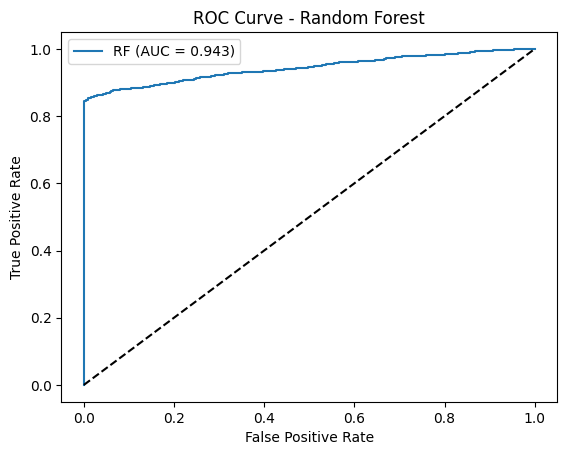

In [ ]:
# Scale numeric columns
scaler_knn = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler_knn.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler_knn.transform(X_test_scaled[numeric_cols])

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Metrics
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Predicted probabilities for positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC AUC
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {auc:.6f}")

# Brier Score (BS) and Brier Skill Score (BSS)
bs = brier_score_loss(y_test, y_prob)
p_ref = float(np.mean(y_test))
bs_ref = float(np.mean((y_test - p_ref) ** 2))
bss = 1.0 - (bs / bs_ref) if bs_ref != 0 else 0.0
print(f"Brier Score (BS): {bs:.6f}")
print(f"Brier Skill Score (BSS): {bss:.6f}")

# ROC Curve plot
fpr_vals, tpr_vals, _ = roc_curve(y_test, y_prob)
plt.plot(fpr_vals, tpr_vals, label=f'RF (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Get TP, TN, FP, FN manually
TP, TN, FP, FN = manual_confusion_matrix(y_test.tolist(), y_pred_rf.tolist())

Manual Confusion Matrix:
True Positives (TP): 1020
True Negatives (TN): 795
False Positives (FP): 11
False Negatives (FN): 174


In [ ]:
# Scaling numeric columns before cross-validation
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# model and 10-fold CV
model = RandomForestClassifier(n_estimators=100, random_state=23)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

# per-fold and average accuracy
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")
print(f"\nAverage Accuracy across 10 folds: {np.mean(cv_scores):.4f}")

Fold 1: Accuracy = 0.8990
Fold 2: Accuracy = 0.9250
Fold 3: Accuracy = 0.9050
Fold 4: Accuracy = 0.9140
Fold 5: Accuracy = 0.8840
Fold 6: Accuracy = 0.9150
Fold 7: Accuracy = 0.9100
Fold 8: Accuracy = 0.9210
Fold 9: Accuracy = 0.9220
Fold 10: Accuracy = 0.9220

Average Accuracy across 10 folds: 0.9117


In [ ]:
# 10-Fold Cross-Validation for KNN (per-fold metrics + average)

n_splits = 10
n_neighbors = 25           # regularized choice
weights = 'uniform'        # 'uniform' or 'distance'
p = 2                      # Euclidean
random_state = 42

# Prepare numeric columns reference
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
fold_results = []

def sdiv(a, b): return float(a) / float(b) if float(b) != 0 else 0.0

for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    # Split
    X_tr, X_te = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
    y_tr, y_te = y.iloc[train_idx].values, y.iloc[test_idx].values

    # Scale numeric features
    scaler = StandardScaler()
    if len(numeric_cols) > 0:
        X_tr[numeric_cols] = scaler.fit_transform(X_tr[numeric_cols])
        X_te[numeric_cols] = scaler.transform(X_te[numeric_cols])

    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p, n_jobs=-1)
    knn.fit(X_tr, y_tr)

    # Predictions
    y_pred = knn.predict(X_te)
    y_prob = knn.predict_proba(X_te)[:, 1] if hasattr(knn, "predict_proba") else None

    # Confusion matrix
    cm = confusion_matrix(y_te, y_pred)
    TN, FP, FN, TP = cm.ravel()

    P = TP + FN
    N = TN + FP
    total = P + N

    # Rates & metrics
    TPR = sdiv(TP, P)
    TNR = sdiv(TN, N)
    FPR = sdiv(FP, N)
    FNR = sdiv(FN, P)
    Accuracy = sdiv(TP + TN, total)
    Precision = sdiv(TP, TP + FP)
    Recall = TPR
    F1 = sdiv(2 * Precision * Recall, (Precision + Recall)) if (Precision + Recall) != 0 else 0.0
    Balanced_Accuracy = 0.5 * (TPR + TNR)
    Error_rate = sdiv(FP + FN, total)
    TSS = TPR - FPR
    numerator_hss = 2.0 * (TP * TN - FP * FN)
    denom_hss = ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    HSS = sdiv(numerator_hss, denom_hss)

    # Probabilistic metrics
    if y_prob is not None:
        BS = float(brier_score_loss(y_te, y_prob))
        p_ref = float(np.mean(y_te))
        BS_ref = float(np.mean((y_te - p_ref) ** 2))
        BSS = 1.0 - (BS / BS_ref) if BS_ref != 0 else 0.0
        try:
            AUC = float(roc_auc_score(y_te, y_prob)) if len(np.unique(y_te)) > 1 else None
        except Exception:
            AUC = None
    else:
        BS = float(np.mean((y_te - y_pred) ** 2))
        p_ref = float(np.mean(y_te))
        BS_ref = float(np.mean((y_te - p_ref) ** 2))
        BSS = 1.0 - (BS / BS_ref) if BS_ref != 0 else 0.0
        AUC = None

    fold_results.append({
        'Fold': fold_idx,
        'TP': int(TP), 'TN': int(TN), 'FP': int(FP), 'FN': int(FN),
        'P': int(P), 'N': int(N),
        'TPR': round(TPR, 4), 'TNR': round(TNR, 4), 'FPR': round(FPR, 4), 'FNR': round(FNR, 4),
        'Accuracy': round(Accuracy, 4), 'Balanced_Accuracy': round(Balanced_Accuracy, 4),
        'Precision': round(Precision, 4), 'Recall': round(Recall, 4), 'F1': round(F1, 4),
        'Error_Rate': round(Error_rate, 4), 'TSS': round(TSS, 4), 'HSS': round(HSS, 4),
        'Brier_Score': round(BS, 6), 'BSS': round(BSS, 6), 'AUC': round(AUC, 6) if AUC is not None else None
    })

results_df = pd.DataFrame(fold_results).set_index('Fold')
pd.set_option('display.precision', 4)
display(results_df)

avg_row = results_df.mean(numeric_only=True).to_frame().T
avg_row.index = ['Average']
display(avg_row)

,TP,TN,FP,FN,P,N,TPR,TNR,FPR,FNR,...,Balanced_Accuracy,Precision,Recall,F1,Error_Rate,TSS,HSS,Brier_Score,BSS,AUC
Fold,,,,,,,,,,,,,,,,,,,,,
1,494,303,100,103,597,403,0.8275,0.7519,0.2481,0.1725,...,0.7897,0.8316,0.8275,0.8296,0.203,0.5793,0.5786,0.1418,0.4108,0.8820
2,521,313,90,76,597,403,0.8727,0.7767,0.2233,0.1273,...,0.8247,0.8527,0.8727,0.8626,0.166,0.6494,0.6531,0.1346,0.4407,0.8957
3,496,323,80,101,597,403,0.8308,0.8015,0.1985,0.1692,...,0.8162,0.8611,0.8308,0.8457,0.181,0.6323,0.6270,0.1349,0.4392,0.8963
4,522,307,96,75,597,403,0.8744,0.7618,0.2382,0.1256,...,0.8181,0.8447,0.8744,0.8593,0.171,0.6362,0.6416,0.1328,0.4482,0.9014
5,497,306,97,100,597,403,0.8325,0.7593,0.2407,0.1675,...,0.7959,0.8367,0.8325,0.8346,0.197,0.5918,0.5911,0.1461,0.3929,0.8723
6,512,314,89,85,597,403,0.8576,0.7792,0.2208,0.1424,...,0.8184,0.8519,0.8576,0.8548,0.174,0.6368,0.6378,0.1341,0.4428,0.8983
7,501,313,90,96,597,403,0.8392,0.7767,0.2233,0.1608,...,0.8079,0.8477,0.8392,0.8434,0.186,0.6159,0.6144,0.1372,0.4296,0.8886
8,510,312,91,87,597,403,0.8543,0.7742,0.2258,0.1457,...,0.8142,0.8486,0.8543,0.8514,0.178,0.6285,0.6295,0.1360,0.4346,0.8968
9,527,296,107,70,597,403,0.8827,0.7345,0.2655,0.1173,...,0.8086,0.8312,0.8827,0.8562,0.177,0.6172,0.6266,0.1286,0.4654,0.9114


,TP,TN,FP,FN,P,N,TPR,TNR,FPR,FNR,...,Balanced_Accuracy,Precision,Recall,F1,Error_Rate,TSS,HSS,Brier_Score,BSS,AUC
Average,510.0,310.0,92.9,87.1,597.1,402.9,0.8541,0.7694,0.2306,0.1459,...,0.8118,0.846,0.8541,0.8499,0.18,0.6236,0.6251,0.1354,0.4373,0.8955


In [ ]:
#